In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os

#Семен Александрович, у меня выдавало ошибку по вашей схеме, поэтому я все разбила по частям, и местами импортировала больше.
#Смотрится странно, но работает.

In [2]:
import pandas as pd


In [3]:
import time

In [4]:
import re

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install lxml

In [7]:
import matplotlib

In [8]:
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [9]:
!pip3 install pandas

Получаем 250 самых топовых фильмов

In [10]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [11]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [12]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263480742423,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143136876482,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989565333884787,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984020124775428,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951047595463974,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Всё везде и сразу], \n...",8.006508805151277,"Dan Kwan (dir.), Michelle Yeoh, Stephanie Hsu",/title/tt6710474/
246,"[\n 247.\n , [Стальной гигант], \n, ...",8.005156901955317,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [Аладдин], \n, [(1992)]...",8.00508723784485,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/
248,"[\n 249.\n , [Прислуга], \n, [(2011)...",8.004898654113116,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [13]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [14]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [15]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [16]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263480742423,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143136876482,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989565333884787,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984020124775428,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951047595463974,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957


In [17]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

In [18]:
#Задача 1.Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен.
crew_list = data["crew"].tolist()
crew_list = [s.replace(" (dir.)", "") for s in crew_list]
crew_list


['Frank Darabont, Tim Robbins, Morgan Freeman',
 'Francis Ford Coppola, Marlon Brando, Al Pacino',
 'Christopher Nolan, Christian Bale, Heath Ledger',
 'Francis Ford Coppola, Al Pacino, Robert De Niro',
 'Sidney Lumet, Henry Fonda, Lee J. Cobb',
 'Steven Spielberg, Liam Neeson, Ralph Fiennes',
 'Peter Jackson, Elijah Wood, Viggo Mortensen',
 'Quentin Tarantino, John Travolta, Uma Thurman',
 'Peter Jackson, Elijah Wood, Ian McKellen',
 'Sergio Leone, Clint Eastwood, Eli Wallach',
 'Robert Zemeckis, Tom Hanks, Robin Wright',
 'David Fincher, Brad Pitt, Edward Norton',
 'Peter Jackson, Elijah Wood, Ian McKellen',
 'Christopher Nolan, Leonardo DiCaprio, Joseph Gordon-Levitt',
 'Irvin Kershner, Mark Hamill, Harrison Ford',
 'Lana Wachowski, Keanu Reeves, Laurence Fishburne',
 'Martin Scorsese, Robert De Niro, Ray Liotta',
 'Milos Forman, Jack Nicholson, Louise Fletcher',
 'David Fincher, Morgan Freeman, Brad Pitt',
 'Akira Kurosawa, Toshirô Mifune, Takashi Shimura',
 'Frank Capra, James Ste

In [19]:
crew_list = ' '.join(crew_list)
crew_list


"Frank Darabont, Tim Robbins, Morgan Freeman Francis Ford Coppola, Marlon Brando, Al Pacino Christopher Nolan, Christian Bale, Heath Ledger Francis Ford Coppola, Al Pacino, Robert De Niro Sidney Lumet, Henry Fonda, Lee J. Cobb Steven Spielberg, Liam Neeson, Ralph Fiennes Peter Jackson, Elijah Wood, Viggo Mortensen Quentin Tarantino, John Travolta, Uma Thurman Peter Jackson, Elijah Wood, Ian McKellen Sergio Leone, Clint Eastwood, Eli Wallach Robert Zemeckis, Tom Hanks, Robin Wright David Fincher, Brad Pitt, Edward Norton Peter Jackson, Elijah Wood, Ian McKellen Christopher Nolan, Leonardo DiCaprio, Joseph Gordon-Levitt Irvin Kershner, Mark Hamill, Harrison Ford Lana Wachowski, Keanu Reeves, Laurence Fishburne Martin Scorsese, Robert De Niro, Ray Liotta Milos Forman, Jack Nicholson, Louise Fletcher David Fincher, Morgan Freeman, Brad Pitt Akira Kurosawa, Toshirô Mifune, Takashi Shimura Frank Capra, James Stewart, Donna Reed Jonathan Demme, Jodie Foster, Anthony Hopkins Fernando Meirelles

In [20]:
len(crew_list)

11283

In [21]:
crew_list = crew_list.split(',')

i = 0
for word in list(crew_list):  
    if crew_list.count(word) > 1:
        crew_list.remove(word)
print(crew_list)


['Frank Darabont', ' Tim Robbins', ' Morgan Freeman Francis Ford Coppola', ' Al Pacino Christopher Nolan', ' Heath Ledger Francis Ford Coppola', ' Robert De Niro Sidney Lumet', ' Lee J. Cobb Steven Spielberg', ' Liam Neeson', ' Ralph Fiennes Peter Jackson', ' Viggo Mortensen Quentin Tarantino', ' John Travolta', ' Uma Thurman Peter Jackson', ' Ian McKellen Sergio Leone', ' Eli Wallach Robert Zemeckis', ' Robin Wright David Fincher', ' Edward Norton Peter Jackson', ' Elijah Wood', ' Ian McKellen Christopher Nolan', ' Joseph Gordon-Levitt Irvin Kershner', ' Harrison Ford Lana Wachowski', ' Keanu Reeves', ' Laurence Fishburne Martin Scorsese', ' Ray Liotta Milos Forman', ' Louise Fletcher David Fincher', ' Morgan Freeman', ' Brad Pitt Akira Kurosawa', ' Takashi Shimura Frank Capra', ' Donna Reed Jonathan Demme', ' Jodie Foster', ' Anthony Hopkins Fernando Meirelles', ' Alexandre Rodrigues', ' Leandro Firmino Steven Spielberg', ' Matt Damon Roberto Benigni', ' Roberto Benigni', ' Nicoletta

In [22]:
len(crew_list)

433

In [23]:
# Задача 2. Получить список всех директоров. 
#Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.
crew_list = data["crew"].tolist()
crew_list


['Frank Darabont (dir.), Tim Robbins, Morgan Freeman',
 'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino',
 'Christopher Nolan (dir.), Christian Bale, Heath Ledger',
 'Francis Ford Coppola (dir.), Al Pacino, Robert De Niro',
 'Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb',
 'Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes',
 'Peter Jackson (dir.), Elijah Wood, Viggo Mortensen',
 'Quentin Tarantino (dir.), John Travolta, Uma Thurman',
 'Peter Jackson (dir.), Elijah Wood, Ian McKellen',
 'Sergio Leone (dir.), Clint Eastwood, Eli Wallach',
 'Robert Zemeckis (dir.), Tom Hanks, Robin Wright',
 'David Fincher (dir.), Brad Pitt, Edward Norton',
 'Peter Jackson (dir.), Elijah Wood, Ian McKellen',
 'Christopher Nolan (dir.), Leonardo DiCaprio, Joseph Gordon-Levitt',
 'Irvin Kershner (dir.), Mark Hamill, Harrison Ford',
 'Lana Wachowski (dir.), Keanu Reeves, Laurence Fishburne',
 'Martin Scorsese (dir.), Robert De Niro, Ray Liotta',
 'Milos Forman (dir.), Jack Nicholson, Louise Fletch

In [24]:
crew_list = [words for crew_list in crew_list for words in crew_list.split(',')]

In [25]:
r = re.compile(".*(dir.)")
directors_list = list(filter(r.match, crew_list)) 
directors_list


['Frank Darabont (dir.)',
 'Francis Ford Coppola (dir.)',
 'Christopher Nolan (dir.)',
 'Francis Ford Coppola (dir.)',
 'Sidney Lumet (dir.)',
 'Steven Spielberg (dir.)',
 'Peter Jackson (dir.)',
 'Quentin Tarantino (dir.)',
 'Peter Jackson (dir.)',
 'Sergio Leone (dir.)',
 'Robert Zemeckis (dir.)',
 'David Fincher (dir.)',
 'Peter Jackson (dir.)',
 'Christopher Nolan (dir.)',
 'Irvin Kershner (dir.)',
 'Lana Wachowski (dir.)',
 'Martin Scorsese (dir.)',
 'Milos Forman (dir.)',
 'David Fincher (dir.)',
 'Akira Kurosawa (dir.)',
 'Frank Capra (dir.)',
 'Jonathan Demme (dir.)',
 'Fernando Meirelles (dir.)',
 'Steven Spielberg (dir.)',
 'Roberto Benigni (dir.)',
 'Christopher Nolan (dir.)',
 'Frank Darabont (dir.)',
 'George Lucas (dir.)',
 'James Cameron (dir.)',
 'Robert Zemeckis (dir.)',
 'Hayao Miyazaki (dir.)',
 'Alfred Hitchcock (dir.)',
 'Roman Polanski (dir.)',
 'Bong Joon Ho (dir.)',
 'Luc Besson (dir.)',
 'Roger Allers (dir.)',
 'Ridley Scott (dir.)',
 'Tony Kaye (dir.)',
 'Mart

In [26]:
len(directors_list)

250

In [27]:
directors_list = [s.replace(" (dir.)", "") for s in directors_list]
directors_list


['Frank Darabont',
 'Francis Ford Coppola',
 'Christopher Nolan',
 'Francis Ford Coppola',
 'Sidney Lumet',
 'Steven Spielberg',
 'Peter Jackson',
 'Quentin Tarantino',
 'Peter Jackson',
 'Sergio Leone',
 'Robert Zemeckis',
 'David Fincher',
 'Peter Jackson',
 'Christopher Nolan',
 'Irvin Kershner',
 'Lana Wachowski',
 'Martin Scorsese',
 'Milos Forman',
 'David Fincher',
 'Akira Kurosawa',
 'Frank Capra',
 'Jonathan Demme',
 'Fernando Meirelles',
 'Steven Spielberg',
 'Roberto Benigni',
 'Christopher Nolan',
 'Frank Darabont',
 'George Lucas',
 'James Cameron',
 'Robert Zemeckis',
 'Hayao Miyazaki',
 'Alfred Hitchcock',
 'Roman Polanski',
 'Bong Joon Ho',
 'Luc Besson',
 'Roger Allers',
 'Ridley Scott',
 'Tony Kaye',
 'Martin Scorsese',
 'Bryan Singer',
 'Christopher Nolan',
 'Damien Chazelle',
 'Michael Curtiz',
 'Masaki Kobayashi',
 'Isao Takahata',
 'Olivier Nakache',
 'Charles Chaplin',
 'Sergio Leone',
 'Alfred Hitchcock',
 'Giuseppe Tornatore',
 'Ridley Scott',
 'Charles Chaplin

In [28]:
data['Directors'] = directors_list
data.head()

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263480742423,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994,Frank Darabont
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143136876482,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972,Francis Ford Coppola
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989565333884787,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008,Christopher Nolan
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984020124775428,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974,Francis Ford Coppola
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951047595463974,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957,Sidney Lumet


<AxesSubplot: >

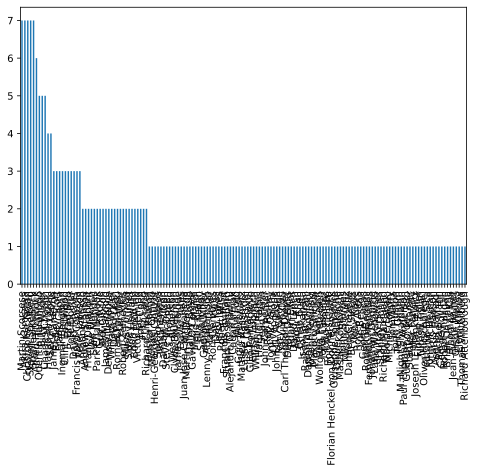

In [29]:
data.Directors.value_counts().plot(kind='bar') 
#так ничего не видно, это все

<AxesSubplot: >

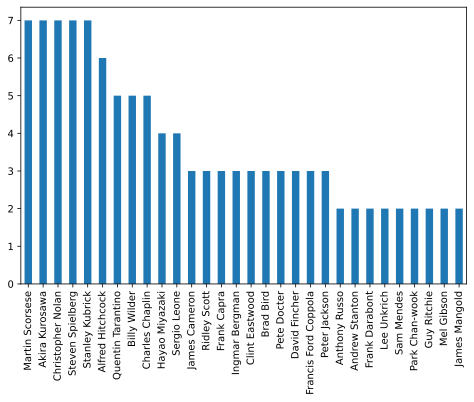

In [30]:
data.Directors.value_counts()[0:30].plot(kind='bar') 
#первые тридцать, видны имена

In [31]:
data.Directors.value_counts().loc[lambda x: x == x.max()]

Martin Scorsese      7
Akira Kurosawa       7
Christopher Nolan    7
Steven Spielberg     7
Stanley Kubrick      7
Name: Directors, dtype: int64

In [32]:
data['ratings']

0      9.235263480742423
1      9.156143136876482
2      8.989565333884787
3      8.984020124775428
4      8.951047595463974
             ...        
245    8.006508805151277
246    8.005156901955317
247     8.00508723784485
248    8.004898654113116
249    8.004105974992983
Name: ratings, Length: 250, dtype: object

In [33]:
data_top_rank = data.sort_values(by=['ratings'], ascending=False)
data_top_rank.head()

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263480742423,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994,Frank Darabont
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143136876482,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972,Francis Ford Coppola
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989565333884787,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008,Christopher Nolan
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984020124775428,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974,Francis Ford Coppola
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951047595463974,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957,Sidney Lumet


In [34]:
data.Directors.value_counts().loc[lambda x: x == x.max()]

Martin Scorsese      7
Akira Kurosawa       7
Christopher Nolan    7
Steven Spielberg     7
Stanley Kubrick      7
Name: Directors, dtype: int64

In [35]:
data.groupby('Directors').size().sort_values(ascending=False)[:15]

Directors
Martin Scorsese         7
Steven Spielberg        7
Christopher Nolan       7
Stanley Kubrick         7
Akira Kurosawa          7
Alfred Hitchcock        6
Charles Chaplin         5
Billy Wilder            5
Quentin Tarantino       5
Sergio Leone            4
Hayao Miyazaki          4
Francis Ford Coppola    3
Frank Capra             3
David Fincher           3
Ingmar Bergman          3
dtype: int64

In [36]:
data['ratings'] = data['ratings'].astype(float, errors = 'raise')
data.head()

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994,Frank Darabont
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972,Francis Ford Coppola
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989565,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008,Christopher Nolan
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984020,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974,Francis Ford Coppola
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951048,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957,Sidney Lumet


In [37]:
import numpy as np

In [38]:
directors_rating = data.groupby('Directors').agg({'ratings': [np.mean]})

In [39]:
directors_rating.head()

,ratings
,mean
Directors,
Aamir Khan,8.212179
Adam Elliot,8.062491
Akira Kurosawa,8.224335
Alejandro G. Iñárritu,8.021298
Alfred Hitchcock,8.262803


In [40]:
from pandas.api.types import is_numeric_dtype

dfs = []

for ratings in directors_rating.columns:
    top_values = []
    if is_numeric_dtype(directors_rating[ratings]):
        top_values = directors_rating[ratings].nlargest(n=5)
        dfs.append(pd.DataFrame({ratings: top_values}).reset_index(drop=True))
pd.concat(dfs, axis=1)


,ratings
,mean
0,8.898786
1,8.854700
2,8.824054
3,8.699707
4,8.669716


In [41]:
directors_rating.astype(float).nlargest(10, ratings)

,ratings
,mean
Directors,
Frank Darabont,8.898786
Francis Ford Coppola,8.854700
Peter Jackson,8.824054
Irvin Kershner,8.699707
Lana Wachowski,8.669716
Robert Zemeckis,8.642729
Jonathan Demme,8.588167
Fernando Meirelles,8.579603


In [42]:
#Задача 3. Найти участника(ов) команд (crew), у которого(ых) больше всего фильмов в топе.
df = data.assign(crew=data['crew'].str.split(',')).explode('crew')
df['crew'] = df['crew'].map(lambda x: x.rstrip('(dir.)'))

df.head()


,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263,Frank Darabont,/title/tt0111161/,Побег из Шоушенка,1994,Frank Darabont
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263,Tim Robbins,/title/tt0111161/,Побег из Шоушенка,1994,Frank Darabont
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263,Morgan Freeman,/title/tt0111161/,Побег из Шоушенка,1994,Frank Darabont
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143,Francis Ford Coppola,/title/tt0068646/,Крёстный отец,1972,Francis Ford Coppola
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143,Marlon Brando,/title/tt0068646/,Крёстный отец,1972,Francis Ford Coppola


In [43]:
df.nlargest(n=5, columns=['ratings'])

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263,Frank Darabont,/title/tt0111161/,Побег из Шоушенка,1994,Frank Darabont
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263,Tim Robbins,/title/tt0111161/,Побег из Шоушенка,1994,Frank Darabont
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263,Morgan Freeman,/title/tt0111161/,Побег из Шоушенка,1994,Frank Darabont
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143,Francis Ford Coppola,/title/tt0068646/,Крёстный отец,1972,Francis Ford Coppola
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143,Marlon Brando,/title/tt0068646/,Крёстный отец,1972,Francis Ford Coppola


In [44]:
df.groupby(['crew'])['ratings'].mean()

crew
 Aamir Khan           8.228665
 Adrien Brody         8.506615
 Akira Ishihama       8.455769
 Akira Terao          8.164385
 Al Pacino            8.649899
                        ...   
William Friedkin      8.027169
William Wyler         8.052578
Wolfgang Petersen     8.312141
Yasujirô Ozu          8.054272
Çagan Irmak           8.021448
Name: ratings, Length: 536, dtype: float64

In [45]:
df.groupby(['crew'])['ratings'].mean().nlargest()

crew
 Tim Robbins       9.235263
 Heath Ledge       8.989565
 Lee J. Cobb       8.951048
 Liam Neeson       8.938272
 Morgan Freeman    8.919739
Name: ratings, dtype: float64

In [46]:
#Задача 4. Построить распределение топовых фильмов по годам

df = data_top_rank[:10]
df[['movies', 'ratings', 'year']]

,movies,ratings,year
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263480742423,1994
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143136876482,1972
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989565333884787,2008
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984020124775428,1974
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951047595463974,1957
5,"[\n 6.\n , [Список Шиндлера], \n, [(...",8.938271577141725,1993
6,"[\n 7.\n , [Властелин колец: Возвращ...",8.929042139144148,2003
7,"[\n 8.\n , [Криминальное чтиво], \n,...",8.848089894443413,1994
8,"[\n 9.\n , [Властелин колец: Братств...",8.808931102424054,2001
9,"[\n 10.\n , [Хороший, плохой, злой],...",8.79065460353791,1966


In [47]:
import matplotlib.pyplot as plt
import numpy as np




In [48]:
data.year.describe()

count      250
unique      86
top       1995
freq         8
Name: year, dtype: object

<AxesSubplot: title={'center': 'Top films (by year)'}, ylabel='Frequency'>

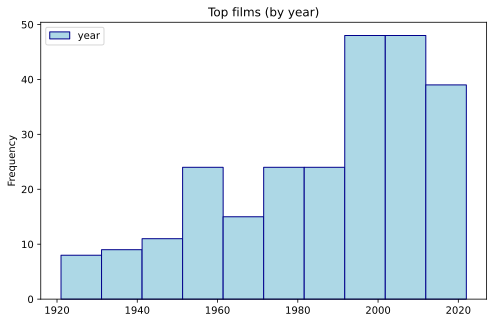

In [49]:
data["year"] = data["year"].astype(float)
data.plot.hist(x = "movies", y = "year", title='Top films (by year)', color = "lightblue", ec="darkblue")



Задача 5. Построить распределение топовых фильмов рейтингу:
*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

In [50]:
data.ratings.describe()

count    250.000000
mean       8.253864
std        0.232279
min        8.004106
25%        8.074675
50%        8.200183
75%        8.360626
max        9.235263
Name: ratings, dtype: float64

<AxesSubplot: title={'center': 'Распределение топовых фильмов по рейтингу (округление до сотых)'}, ylabel='Frequency'>

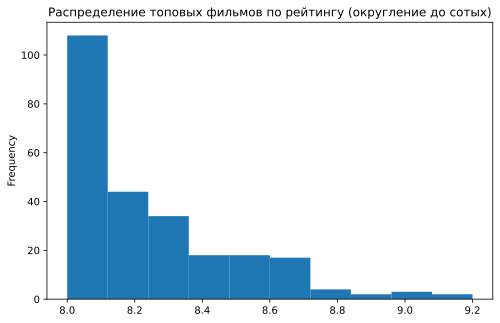

In [51]:
data["ratings"] = pd.to_numeric(data["ratings"])
d2 = data["ratings"].round(decimals=1)
d2.plot.hist(x = "movies", y = "ratings", title='Распределение топовых фильмов по рейтингу (округление до сотых)')

<AxesSubplot: title={'center': 'Распределение топовых фильмов по рейтингу (округление до десятых)'}, ylabel='Frequency'>

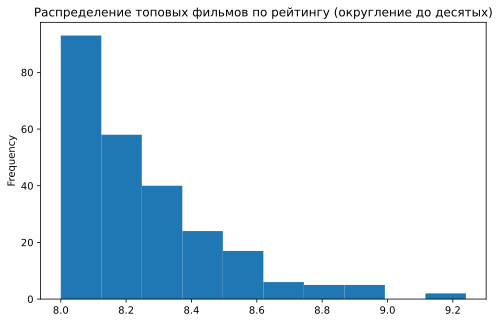

In [52]:
d1 = data["ratings"].round(decimals=2)
d1.plot.hist(x = "movies", y = "ratings", title='Распределение топовых фильмов по рейтингу (округление до десятых)')

<AxesSubplot: title={'center': 'Распределение топовых фильмов по рейтингу (округление до целых)'}, ylabel='Frequency'>

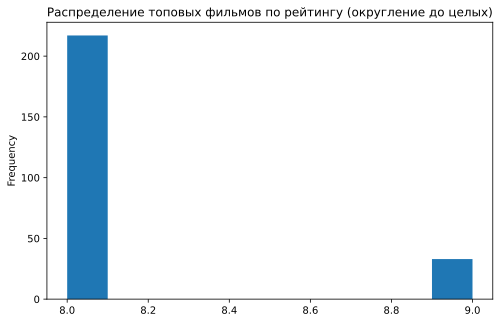

In [53]:
d0 = data["ratings"].round(decimals=0)
d0.plot.hist(x = "movies", y = "ratings", title='Распределение топовых фильмов по рейтингу (округление до целых)')

In [ ]:
#Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. 
#Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.

In [54]:
 film_url = 'http://www.imdb.com/title/tt0068646/'
 html_text = requests.get(film_url).text
#Семен Александрович, не смогла понять причину, код выдавал ошибку (в юпитере ваш тоже). вспомнила, что вы говорили про иммитацию юзера, поискала в нете. получилось так.


In [55]:
pip install beautifulsoup4

In [56]:
pip install fake_useragent

Note: you may need to restart the kernel to use updated packages.


In [57]:
from fake_useragent import UserAgent

ua = UserAgent()
url = "http://www.imdb.com"
headers = {"User-Agent": ua.chrome}
list_for_add = []
cnt = 0
for link in data["links"]:
    film_url = url+link
    html_text = requests.get(film_url, headers=headers).text
    soup = BeautifulSoup(html_text, "lxml")
    cnt+=1

    list_for_add.append(soup.find("meta", attrs={"name": "description"}).get("content"))
    

data["describe"] = list_for_add 

print(data["describe"])

0      Побег из Шоушенка: Directed by Frank Darabont....
1      Крёстный отец: Directed by Francis Ford Coppol...
2      Темный рыцарь: Directed by Christopher Nolan. ...
3      Крёстный отец 2: Directed by Francis Ford Copp...
4      12 рaзгневанных мужчин: Directed by Sidney Lum...
                             ...                        
245    Всё везде и сразу: Directed by Dan Kwan, Danie...
246    Стальной гигант: Directed by Brad Bird. With J...
247    Аладдин: Directed by Ron Clements, John Musker...
248    Прислуга: Directed by Tate Taylor. With Emma S...
249    Ганди: Directed by Richard Attenborough. With ...
Name: describe, Length: 250, dtype: object


In [58]:
data["describe"]

0      Побег из Шоушенка: Directed by Frank Darabont....
1      Крёстный отец: Directed by Francis Ford Coppol...
2      Темный рыцарь: Directed by Christopher Nolan. ...
3      Крёстный отец 2: Directed by Francis Ford Copp...
4      12 рaзгневанных мужчин: Directed by Sidney Lum...
                             ...                        
245    Всё везде и сразу: Directed by Dan Kwan, Danie...
246    Стальной гигант: Directed by Brad Bird. With J...
247    Аладдин: Directed by Ron Clements, John Musker...
248    Прислуга: Directed by Tate Taylor. With Emma S...
249    Ганди: Directed by Richard Attenborough. With ...
Name: describe, Length: 250, dtype: object

In [59]:
data.head()

,movies,ratings,crew,links,title,year,Directors,describe
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994.0,Frank Darabont,Побег из Шоушенка: Directed by Frank Darabont....
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972.0,Francis Ford Coppola,Крёстный отец: Directed by Francis Ford Coppol...
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989565,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008.0,Christopher Nolan,Темный рыцарь: Directed by Christopher Nolan. ...
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984020,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974.0,Francis Ford Coppola,Крёстный отец 2: Directed by Francis Ford Copp...
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951048,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957.0,Sidney Lumet,12 рaзгневанных мужчин: Directed by Sidney Lum...


Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with.

In [60]:
list_actor = ""
cnt = 0

actors = []
for desc in data["describe"]:
    desc = desc.split("With")[1]
    desc = re.split("(?<![A-Z])\. ", desc)[0]
                                                
    actors.append(desc)

print("Найдено фильмов: ", len(actors))
data["actors"] = actors

data.actors

Найдено фильмов:  250


0       Tim Robbins, Morgan Freeman, Bob Gunton, Will...
1       Marlon Brando, Al Pacino, James Caan, Richard...
2       Christian Bale, Heath Ledger, Aaron Eckhart, ...
3       Al Pacino, Robert Duvall, Diane Keaton, Rober...
4       Martin Balsam, John Fiedler, Lee J. Cobb, E.G...
                             ...                        
245     Michelle Yeoh, Stephanie Hsu, Ke Huy Quan, Ja...
246     Jennifer Aniston, Harry Connick Jr., Vin Dies...
247     Scott Weinger, Robin Williams, Linda Larkin, ...
248     Emma Stone, Viola Davis, Bryce Dallas Howard,...
249     Ben Kingsley, Rohini Hattangadi, Roshan Seth,...
Name: actors, Length: 250, dtype: object

In [61]:
data["actors"] = actors
data.head()

,movies,ratings,crew,links,title,year,Directors,describe,actors
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994.0,Frank Darabont,Побег из Шоушенка: Directed by Frank Darabont....,"Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972.0,Francis Ford Coppola,Крёстный отец: Directed by Francis Ford Coppol...,"Marlon Brando, Al Pacino, James Caan, Richard..."
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989565,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008.0,Christopher Nolan,Темный рыцарь: Directed by Christopher Nolan. ...,"Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984020,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974.0,Francis Ford Coppola,Крёстный отец 2: Directed by Francis Ford Copp...,"Al Pacino, Robert Duvall, Diane Keaton, Rober..."
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951048,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957.0,Sidney Lumet,12 рaзгневанных мужчин: Directed by Sidney Lum...,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G..."


In [ ]:
#находятся актеры для 250 фильмов (для всех)

Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


In [62]:
def get_reviews():
    film_url = 'http://www.imdb.com/chart/top'
    html_text = requests.get(film_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    rev = []
    for tag in soup.find_all(attrs={'class': 'ratingColumn imdbRating'}):
        s = tag.find("strong").get("title")
        digit = re.findall("(?<=on)(.*)(?=user)", s)
        rev.append(int(digit[0].strip().replace(",", "")))
    return rev


In [63]:
data["reviews"] = get_reviews()

In [64]:
data.head()

,movies,ratings,crew,links,title,year,Directors,describe,actors,reviews
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235263,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994.0,Frank Darabont,Побег из Шоушенка: Directed by Frank Darabont....,"Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2672060
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156143,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972.0,Francis Ford Coppola,Крёстный отец: Directed by Francis Ford Coppol...,"Marlon Brando, Al Pacino, James Caan, Richard...",1851900
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989565,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008.0,Christopher Nolan,Темный рыцарь: Directed by Christopher Nolan. ...,"Christian Bale, Heath Ledger, Aaron Eckhart, ...",2644893
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984020,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974.0,Francis Ford Coppola,Крёстный отец 2: Directed by Francis Ford Copp...,"Al Pacino, Robert Duvall, Diane Keaton, Rober...",1268030
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951048,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957.0,Sidney Lumet,12 рaзгневанных мужчин: Directed by Sidney Lum...,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G...",789257


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


In [65]:
from collections import Counter

In [66]:
Counter(" ".join(data["title"]).split()).most_common(10)
#в названии фильмов
#Семен Александрович, вы не ставили условие на включение списка стоп-слов, но, технически, их еще можно причесать.

[('и', 9),
 ('В', 7),
 ('на', 5),
 ('в', 4),
 ('отец', 3),
 ('Властелин', 3),
 ('колец:', 3),
 ('Звёздные', 3),
 ('войны.', 3),
 ('Эпизод', 3)]

In [67]:
Counter(" ".join(data["describe"]).split()).most_common(10) 
#в описании фильмов

[('the', 332),
 ('a', 312),
 ('by', 293),
 ('With', 255),
 ('Directed', 250),
 ('to', 232),
 ('of', 206),
 ('and', 175),
 ('his', 142),
 ('in', 125)]

In [69]:
all_words = data['describe'] + data['title'] 
Counter(" ".join(all_words).split()).most_common(10)


[('the', 333),
 ('a', 312),
 ('by', 293),
 ('With', 255),
 ('Directed', 250),
 ('to', 234),
 ('of', 207),
 ('and', 175),
 ('his', 142),
 ('in', 125)]

Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги под картинкой к фильму)